<a href="https://colab.research.google.com/github/jucca182/big_data/blob/main/Estat%C3%ADstica_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#média
#mediana
#moda
#amplitude
#desvio padrão
#correlação (indique qual a variável dependente e independente)
#regressão (prever valores futuros)

In [ ]:
import pandas as pd

dados_enem2019 = pd.read_csv("https://www.dropbox.com/s/jfem9lb6rfdz315/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?dl=1")


provas =["NU_NOTA_MT","NU_NOTA_CN","NU_NOTA_LC","NU_NOTA_CH","NU_NOTA_REDACAO"]
dados_enem2019["NU_NOTA_TOTAL"] = dados_enem2019[provas].sum(axis=1) #cria uma nova coluna somando as notas de todas as provas
#tirar os candidatos que tiraram nota zero
dados_enem2019_sem_zero = dados_enem2019.query("NU_NOTA_TOTAL != 0")

In [ ]:
#media das nota do enem 2019 tirando os outliers(nota=0)
dados_enem2019_sem_zero["NU_NOTA_TOTAL"].mean()/5
#media da nota de ciencia da natureza tirando os outliers(nota=0)
dados_enem2019_sem_zero_cn = dados_enem2019.query("NU_NOTA_CN != 0")
dados_enem2019_sem_zero_cn["NU_NOTA_CN"].mean()

In [ ]:
#mediana da idade dos candidatos
dados_enem2019["NU_IDADE"].median()
#mediana da nota de redação
dados_enem2019["NU_NOTA_REDACAO"].median()

In [ ]:
#moda da idade dos candidatos
dados_enem2019["NU_IDADE"].mode()
#moda da presença do candidato na prova de ciencia da natureza
dados_enem2019["TP_PRESENCA_CN"].mode() #0 = faltou na prova , #1 = presente na prova, #2 = eliminado na prova

In [ ]:
#amplitude da soma das notas totais excluindo o zero
amplitude1 = dados_enem2019_sem_zero["NU_NOTA_TOTAL"].max() - dados_enem2019_sem_zero["NU_NOTA_TOTAL"].min()
#amplitude da idade dos candidatos 
amplitude2 = dados_enem2019["NU_IDADE"].max() - dados_enem2019["NU_IDADE"].min()


In [ ]:
#desvio padrão da soma de todas as provas
dados_enem2019_sem_zero["NU_NOTA_TOTAL"].std()
#desvio padrão das idades dos candidatos
dados_enem2019_sem_zero["NU_IDADE"].std()

In [ ]:
#correlação entre idade e a nota total
#independente = idade
#dependente = nota total
dados_enem2019["NU_IDADE"].corr(dados_enem2019["NU_NOTA_TOTAL"])

#correlação entre a prova de matemática e ciencias da natureza
#independente = prova de matemática
#dependente = ciencias da natureza
dados_enem2019_sem_zero_mt = dados_enem2019.query("NU_NOTA_MT != 0")
dados_enem2019_sem_zero_mt["NU_NOTA_MT"].corr(dados_enem2019_sem_zero_cn["NU_NOTA_CN"])

(0.0, 1000.0)

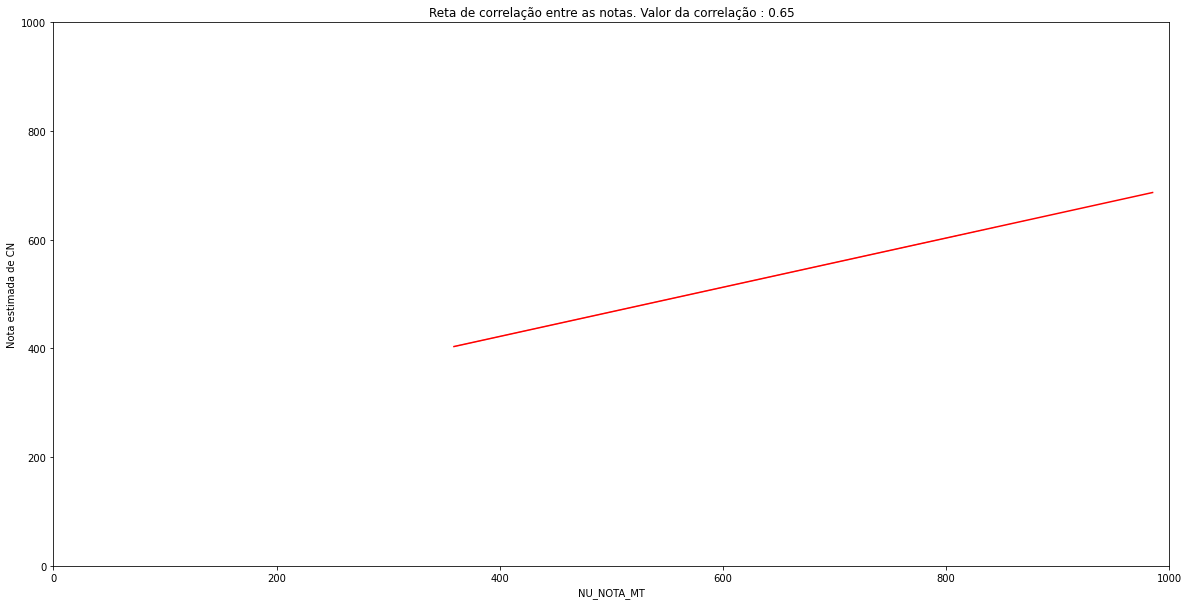

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#regressão (prever valores futuros)
#Y = MX + B
dados_enem2019_sem_zero_mt_cn = dados_enem2019.query("NU_NOTA_MT !=0 and NU_NOTA_CN !=0 and NU_NOTA_MT!= 'NaN' and NU_NOTA_CN !='NaN'")
m,b = np.polyfit(x=dados_enem2019_sem_zero_mt_cn["NU_NOTA_MT"],y=dados_enem2019_sem_zero_mt_cn["NU_NOTA_CN"],deg=1)

#Grafico que relaciona as notas de matematica e ciencias da natureza. 
#Será que quem vai bem em matemática está relacionado com ir bem em ciências da natureza?
correlacao = dados_enem2019_sem_zero_mt_cn["NU_NOTA_MT"].corr(dados_enem2019_sem_zero_mt_cn["NU_NOTA_CN"]) 
modelo = m*dados_enem2019_sem_zero_mt_cn["NU_NOTA_MT"] + b
modelo = modelo.rename("Nota estimada de CN")
#gráfico mostrando a estimativa da relação entre as notas
plt.figure(figsize=(20,10))
plt.title("Reta de correlação entre as notas. Valor da correlação : %.2f" % correlacao)
grafico_reta_mt_cn = sns.lineplot(x=dados_enem2019_sem_zero_mt_cn["NU_NOTA_MT"],y=modelo,color = "red") #demora para executar devido ao tamanho do dataframe
plt.xlim((0, 1000))
plt.ylim((0, 1000))
#grafico_dispersao_mt_cn = sns.relplot(x=dados_enem2019_sem_zero_mt_cn["NU_NOTA_MT"],y=dados_enem2019_sem_zero_mt_cn["NU_NOTA_CN"],color="blue")
